This is the notebook that I will be using for the Capstone Project.

In [ ]:
import pandas as pd
import numpy as np
print("Hello Capstone Project Course!")

# Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto
## PART I

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

## Get library to parse HTML and XLM docs

In [3]:
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

## Get and Process the data

In [4]:
#get and load the data
cdata = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup = BeautifulSoup(cdata, 'lxml')

table = soup.find("table")
table_rows = table.tbody.find_all("tr")

res = []
for tr in table_rows:
    td = tr.find_all("td")
    row = [tr.text for tr in td]
    #res.append(row)

    # Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    if row != [] and row[1] != "Not assigned":
        # If a cell has a borough but a "Not assigned" neighborhood, then the neighborhood will be the same as the borough.
        if "Not assigned" in row[2]: 
            row[2] = row[1]
        res.append(row)
    
# Dataframe with 3 columns
df = pd.DataFrame(res, columns = ["PostalCode", "Borough", "Neighborhood"])
df.head()

,PostalCode,Borough,Neighborhood
0,M1A\n,Not assigned\n,\n
1,M2A\n,Not assigned\n,\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"


## Remove trailing lines

In [4]:
#remove trailing lines
df["Neighborhood"] = df["Neighborhood"].str.replace("\n","")
df["Borough"] = df["Borough"].str.replace("\n","")
df["PostalCode"] = df["PostalCode"].str.replace("\n","")
df

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


## Drop cells with a borough that is Not assigned

In [5]:
# drop cells with a borough that is Not assigned
df = df[df.Borough != "Not assigned"].reset_index(drop=True)
df


,PostalCode,Borough,Neighborhood
0,M1A\n,Not assigned\n,\n
1,M2A\n,Not assigned\n,\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"
5,M6A\n,North York\n,"Lawrence Manor, Lawrence Heights\n"
6,M7A\n,Downtown Toronto\n,"Queen's Park, Ontario Provincial Government\n"
7,M8A\n,Not assigned\n,\n
8,M9A\n,Etobicoke\n,"Islington Avenue, Humber Valley Village\n"
9,M1B\n,Scarborough\n,"Malvern, Rouge\n"


## Group neighborhoods with same postal code

In [6]:
df2 = df.groupby(["PostalCode", "Borough"])["Neighborhood"].apply(", ".join).reset_index()
df2

,PostalCode,Borough,Neighborhood
0,M1A\n,Not assigned\n,\n
1,M1B\n,Scarborough\n,"Malvern, Rouge\n"
2,M1C\n,Scarborough\n,"Rouge Hill, Port Union, Highland Creek\n"
3,M1E\n,Scarborough\n,"Guildwood, Morningside, West Hill\n"
4,M1G\n,Scarborough\n,Woburn\n
5,M1H\n,Scarborough\n,Cedarbrae\n
6,M1J\n,Scarborough\n,Scarborough Village\n
7,M1K\n,Scarborough\n,"Kennedy Park, Ionview, East Birchmount Park\n"
8,M1L\n,Scarborough\n,"Golden Mile, Clairlea, Oakridge\n"
9,M1M\n,Scarborough\n,"Cliffside, Cliffcrest, Scarborough Village West\n"


In [7]:
df2.shape

(180, 3)

# Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto
## PART II

## Get the latitude and the longitude coordinates of each neighborhood.

## Import the GEO file

In [26]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f14e189eae424d6781277d6e0645d12c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jhSokjDPBk_MwtvlspHg2MPYM8ohIRXNfJzwt4zdsEzp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f14e189eae424d6781277d6e0645d12c.get_object(Bucket='capstoneproject-donotdelete-pr-paqjkec78oziqz',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
dfgeo = pd.read_csv(body)
dfgeo.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


## Combine our 2 dataframes into one dataframe

In [27]:
df_merged = pd.merge(df2, dfgeo, how='left', left_on = 'PostalCode', right_on = 'Postal Code')
# remove the "Postal Code" column
df_merged.drop("Postal Code", axis=1, inplace=True)
df_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1A\n,Not assigned\n,\n,NaN,NaN
1,M1B\n,Scarborough\n,"Malvern, Rouge\n",NaN,NaN
2,M1C\n,Scarborough\n,"Rouge Hill, Port Union, Highland Creek\n",NaN,NaN
3,M1E\n,Scarborough\n,"Guildwood, Morningside, West Hill\n",NaN,NaN
4,M1G\n,Scarborough\n,Woburn\n,NaN,NaN
5,M1H\n,Scarborough\n,Cedarbrae\n,NaN,NaN
6,M1J\n,Scarborough\n,Scarborough Village\n,NaN,NaN
7,M1K\n,Scarborough\n,"Kennedy Park, Ionview, East Birchmount Park\n",NaN,NaN
8,M1L\n,Scarborough\n,"Golden Mile, Clairlea, Oakridge\n",NaN,NaN
9,M1M\n,Scarborough\n,"Cliffside, Cliffcrest, Scarborough Village West\n",NaN,NaN


## PART III
## Explore and cluster the neighborhoods in Toronto.
## Only look at boroughs that contain the word "Toronto".

In [28]:
df_toronto_only = df_merged[df_merged['Borough'].str.contains("Toronto")].reset_index(drop=True)
df_toronto_only.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E\n,East Toronto\n,The Beaches\n,NaN,NaN
1,M4K\n,East Toronto\n,"The Danforth West, Riverdale\n",NaN,NaN
2,M4L\n,East Toronto\n,"India Bazaar, The Beaches West\n",NaN,NaN
3,M4M\n,East Toronto\n,Studio District\n,NaN,NaN
4,M4N\n,Central Toronto\n,Lawrence Park\n,NaN,NaN


# Show map of region

## Create overview map of Toronto using coordinates

In [24]:
# create map of Toronto using latitude and longitude values
address = "Toronto, ON"

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
print(latitude, longitude)
map_toronto

Solving environment: done

# All requested packages already installed.

43.6534817 -79.3839347


## Only map those with Toronto in city name

In [30]:
df_toronto_name = df_toronto_only[df_toronto_only['Borough'].str.contains("Toronto")].reset_index(drop=True)
df_toronto_name.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E\n,East Toronto\n,The Beaches\n,NaN,NaN
1,M4K\n,East Toronto\n,"The Danforth West, Riverdale\n",NaN,NaN
2,M4L\n,East Toronto\n,"India Bazaar, The Beaches West\n",NaN,NaN
3,M4M\n,East Toronto\n,Studio District\n,NaN,NaN
4,M4N\n,Central Toronto\n,Lawrence Park\n,NaN,NaN


# FINAL REPORT

In [33]:
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    


In [326]:
#CLIENT_ID = '0L3PXPARVBNLRRDFFVPJNYTC3TKQO0BL3AVFOAQPTM1QSTG' # your Foursquare ID
#CLIENT_SECRET = 'FNAZ2LQHYOM3I2JPYBRNRWZUOXIHMGOFXUA5RGIWVHKSD0C2' # your Foursquare Secret
#VERSION = '20180604'
#LIMIT = 100
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)
import os
#CLIENT_ID = os.environ['0L3PXPARVBNLRRDFFVPJNYTC3TKQO0BL3AVFOAQPTM1QSTG'] # your Foursquare ID
#CLIENT_SECRET = os.environ['FNAZ2LQHYOM3I2JPYBRNRWZUOXIHMGOFXUA5RGIWVHKSD0C2'] # your Foursquare Secret
CLIENT_ID = 'Z1MJFHZEAXOPBVLFNHTK3P1CWEAEXG30QDAOEDIKUMF4LNWC' # your Foursquare ID
CLIENT_SECRET = 'UXFVNJUCPJORF22Z1WWV1LEKQGDKIJN123KGXLSLNMC0PPFN' # your Foursquare Secret

VERSION = '20180604' # Foursquare API version
LIMIT = 45 

#url to fetch data from foursquare api
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
       CLIENT_ID, 
       CLIENT_SECRET, 
       VERSION, 
       lat, 
       lng, 
       radius, 
       LIMIT)


In [327]:
search_query = 'Gym'
radius = 10000
print(search_query + ' .... OK!')

Gym .... OK!


In [328]:
#get requests and examine results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ecd9e1cbae9a2001b1c59d0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 240,
  'suggestedBounds': {'ne': {'lat': 43.74098514166601,
    'lng': -79.25984909407437},
   'sw': {'lat': 43.56098496166583, 'lng': -79.50815554762191}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          'lng': -79.38529600606677}],
    

In [338]:
import os
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
tgym =pd.DataFrame(columns=column_names)
count=1
for row in df_merged.values.tolist():
    PostalCode, Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    gyms=venues[venues['Category']=='Gym']   
    print('(',count,'/',len(df_merged),')','Gyms in '+Neighborhood+', '+Borough+':'+str(len(gyms)))
    for resturant_detail in gyms.values.tolist():
        id, name , category=resturant_detail
        tgym = tgym.append({'Borough': Borough,'Neighborhood': Neighborhood, 'ID': id, 'Name' : name}, ignore_index=True)
    count+=1

( 1 / 103 ) Gyms in Malvern, Rouge, Scarborough:1
( 2 / 103 ) Gyms in Rouge Hill, Port Union, Highland Creek, Scarborough:1
( 3 / 103 ) Gyms in Guildwood, Morningside, West Hill, Scarborough:1
( 4 / 103 ) Gyms in Woburn, Scarborough:1
( 5 / 103 ) Gyms in Cedarbrae, Scarborough:1
( 6 / 103 ) Gyms in Scarborough Village, Scarborough:1
( 7 / 103 ) Gyms in Kennedy Park, Ionview, East Birchmount Park, Scarborough:1
( 8 / 103 ) Gyms in Golden Mile, Clairlea, Oakridge, Scarborough:1
( 9 / 103 ) Gyms in Cliffside, Cliffcrest, Scarborough Village West, Scarborough:1
( 10 / 103 ) Gyms in Birch Cliff, Cliffside West, Scarborough:1
( 11 / 103 ) Gyms in Dorset Park, Wexford Heights, Scarborough Town Centre, Scarborough:1
( 12 / 103 ) Gyms in Wexford, Maryvale, Scarborough:1
( 13 / 103 ) Gyms in Agincourt, Scarborough:1
( 14 / 103 ) Gyms in Clarks Corners, Tam O'Shanter, Sullivan, Scarborough:1
( 15 / 103 ) Gyms in Milliken, Agincourt North, Steeles East, L'Amoreaux East, Scarborough:1
( 16 / 103 ) 

In [342]:
#now analyze datafraame
tgym


,Borough,Neighborhood,ID,Name
0,Scarborough,"Malvern, Rouge",501ae947e4b0d11883b910a7,Equinox Bay Street
1,Scarborough,"Rouge Hill, Port Union, Highland Creek",501ae947e4b0d11883b910a7,Equinox Bay Street
2,Scarborough,"Guildwood, Morningside, West Hill",501ae947e4b0d11883b910a7,Equinox Bay Street
3,Scarborough,Woburn,501ae947e4b0d11883b910a7,Equinox Bay Street
4,Scarborough,Cedarbrae,501ae947e4b0d11883b910a7,Equinox Bay Street
5,Scarborough,Scarborough Village,501ae947e4b0d11883b910a7,Equinox Bay Street
6,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",501ae947e4b0d11883b910a7,Equinox Bay Street
7,Scarborough,"Golden Mile, Clairlea, Oakridge",501ae947e4b0d11883b910a7,Equinox Bay Street
8,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",501ae947e4b0d11883b910a7,Equinox Bay Street
9,Scarborough,"Birch Cliff, Cliffside West",501ae947e4b0d11883b910a7,Equinox Bay Street


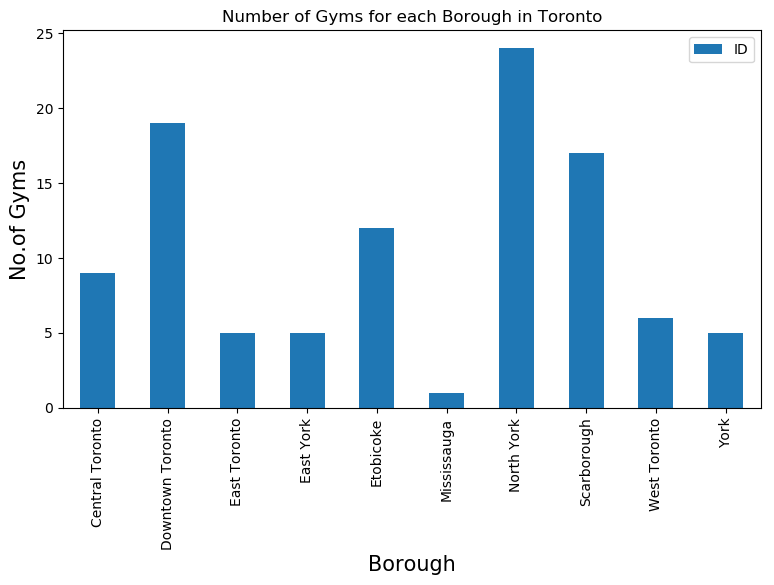

In [341]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Gyms for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Gyms', fontsize=15)
#giving a bar plot
tgym.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()